In [1]:
import ema as em
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
%config InlineBackend.figure_format = 'svg'

# Example 12.3

(Page 335 of CE-220 Fall 2019 course reader)

In [7]:
mdl = em.Model(2,3)

n1 = mdl.node('1',  0.0,  0.0)
n2 = mdl.node('2',  0.0,  5.0)
n3 = mdl.node('3',  4.0,  5.0)
n4 = mdl.node('4',  8.0,  5.0)
n5 = mdl.node('5',  8.0,  0.0)

a = mdl.beam('a', n1,  n2, Qpl = [1e5, 150, 150])
b = mdl.beam('b', n2,  n3, Qpl = [1e5, 120, 120])
c = mdl.beam('c', n3,  n4, Qpl = [1e5, 120, 120])
d = mdl.beam('d', n4,  n5, Qpl = [1e5, 150, 150])

mdl.fix(n1, ['x', 'y', 'rz'])
mdl.fix(n5, ['x', 'y', 'rz'])

n2.p['x'] =  30
n3.p['y'] = -50

mdl.numDOF()
em.analysis.characterize(mdl)

(0, 3)

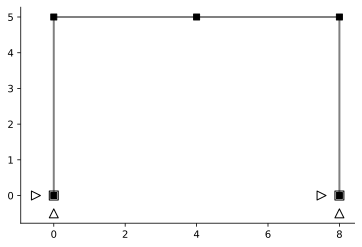

In [8]:
fig, ax = plt.subplots()
em.plot_structure(mdl, ax)

In [9]:
A = em.A_matrix(mdl)
A.c

,$1$,$2$,$3$,$4$,$5$,$6$,$7$,$8$,$9$
$a_1$,0.0,1.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0
$a_2$,0.2,-0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0
$a_3$,0.2,-0.00,1.0,0.0,0.00,0.0,0.0,0.00,0.0
$b_1$,-1.0,-0.00,0.0,1.0,0.00,0.0,0.0,0.00,0.0
$b_2$,-0.0,0.25,1.0,0.0,-0.25,0.0,0.0,0.00,0.0
$b_3$,-0.0,0.25,0.0,0.0,-0.25,1.0,0.0,0.00,0.0
$c_1$,0.0,0.00,0.0,-1.0,-0.00,0.0,1.0,0.00,0.0
$c_2$,0.0,0.00,0.0,-0.0,0.25,1.0,0.0,-0.25,0.0
$c_3$,0.0,0.00,0.0,-0.0,0.25,0.0,0.0,-0.25,1.0
$d_1$,0.0,0.00,0.0,0.0,0.00,0.0,-0.0,1.00,0.0


In [10]:
var = em.analysis.setupPlasticAnalysis_wLBT(mdl)

In [11]:
em.analysis.PlasticAnalysis_wLBT(mdl)

ValueError: Phase 1 of the simplex method failed to find a feasible solution. The pseudo-objective function evaluates to 2.9e-11 which exceeds the required tolerance of 1e-12 for a solution to be considered 'close enough' to zero to be a basic solution. Consider increasing the tolerance to be greater than 2.9e-11. If this tolerance is unacceptably  large the problem may be infeasible.